# Scatterplots and Correlation #

In this notebook we will:

- Review scatterplots
- Learn how to compute correlation using `scipy.stats.pearsonr` (but we're going to rename it `cor`). 
- Learn to interpret the correlation
- Learn some useful facts about correlation

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import scipy.stats as stats

from IPython.core.display import display, HTML
toggle_code_str2 = '''
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Figure Code"></form>
'''

toggle_code_prepare_str2 = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>

'''

#display(HTML(toggle_code_prepare_str2 + toggle_code_str2))

def hide_code_figure():
    display(HTML(toggle_code_str2))
    
from IPython.core.display import display, HTML
toggle_code_str = '''
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Hide/Show Code (Too Advanced or Not the Point)"></form>
'''

toggle_code_prepare_str = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>

'''

display(HTML(toggle_code_prepare_str + toggle_code_str))

def hide_code():
    display(HTML(toggle_code_str))


## What is a Scatterplot? ##

When you have two numeric variables that may (or may not) be related or associated, we can put one on a horizontal axis and the other on the vertical axis.  Then each observation is represented as a dot on the x-y plane.  Like below.  

If you also have categorical variables you'd like to encode along with the two quantitative variables, you can use different symbols or different colors on the scatterplot to do that.  



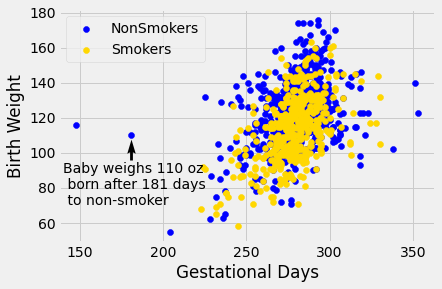

In [2]:
births = Table.read_table('baby.csv')
NonSmokers = births.where('Maternal Smoker', False).select("Gestational Days", "Birth Weight")
Smokers = births.where('Maternal Smoker', True ).select("Gestational Days", "Birth Weight")
    
plots.scatter(NonSmokers[0], NonSmokers[1], color = "blue", label="NonSmokers")
plots.scatter(Smokers[0], Smokers[1], color = "gold", label = "Smokers")
plots.xlabel('Gestational Days')
plots.ylabel('Birth Weight')
plots.quiver(181,96,0,3)
plots.text(140, 70,"Baby weighs 110 oz\n born after 181 days\n to non-smoker")
plots.legend();


hide_code()

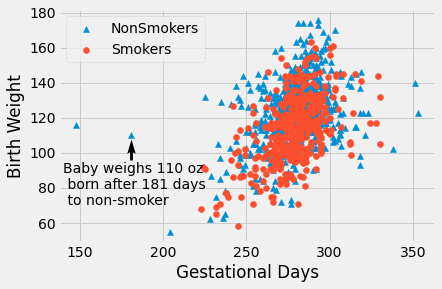

In [3]:
plots.scatter(NonSmokers[0], NonSmokers[1], marker="^", label="NonSmokers")
plots.scatter(Smokers[0], Smokers[1], label = "Smokers")
plots.xlabel('Gestational Days')
plots.ylabel('Birth Weight')
plots.quiver(181,96,0,3)
plots.text(140, 70,"Baby weighs 110 oz\n born after 181 days\n to non-smoker")
plots.legend();




In [4]:
NonSmokers.sort("Gestational Days").show(5)

Gestational Days,Birth Weight
148,116
181,110
204,55
225,132
228,62


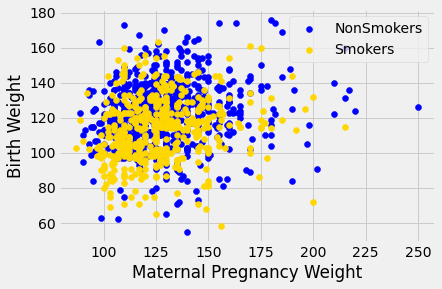

In [5]:
NonSmokers = births.where('Maternal Smoker', False).select("Maternal Pregnancy Weight", "Birth Weight")
Smokers = births.where('Maternal Smoker', True ).select("Maternal Pregnancy Weight", "Birth Weight")
    
plots.scatter(NonSmokers[0], NonSmokers[1], color = "blue", label="NonSmokers")
plots.scatter(Smokers[0], Smokers[1], color = "gold", label = "Smokers")
plots.xlabel('Maternal Pregnancy Weight')
plots.ylabel('Birth Weight')
plots.legend();

## Choosing the axes ##

- x-axis vs y-axis
- Explanatory vs Response Variable
- Independent vs Dependent
- Commonly known vs Weird (Ahem, I mean "less commonly known")

If there is a known or assumed explanatory relationship between the two variables being scatterplotted, then put the explanatory variable on the x-axis.  For example, "I worked 100 homework problems before my first algebra test and made a 97 on the test.  Then I worked 20 problems between the firs test and the second and I made a 35 on the second test."  Put the number of homework problems worked in preparation for the exam on the x-axis.  

If one variable can be directly controlled and the other really can't then the one you can control is the independent variable and the other is a dependent variable.  These concepts could be applied to the example of the homework problems and test scores.  This is also the terminology used in many lab sciences; the amount of reagent added to a chemical reaction would be one of the independent variables and the amount of product at the end of the reaction would be the dependent variable.  

Scatterplot code: If there is no explanatory/response or independent/dependent relationship between the variables, a guideline  (not a rule) is that you put the more common variable on the x-axis.  A classroom activity related to this is for students to measure the length of their forearms (between the wrist and elbow) and record that information along with shoe size.  Everyone knows his or her shoe size (hence this is the common variable), few people can tell us the length of their forearms without measuring it first (hence this is the less common variable).


![piratecode](piratecode.gif)



## Association ##

Variables $X$ and $Y$ display *positive association* when greater than average values of $X$ tend to be paired with greater than average values of $Y$, and vice versa.  

Variables $X$ and $Y$ display *negative association* when greater than average values of $X$ tend to be paired with LESS than average values of $Y$, and vice versa.  


In [6]:
hybrid = Table.read_table('hybrid.csv')

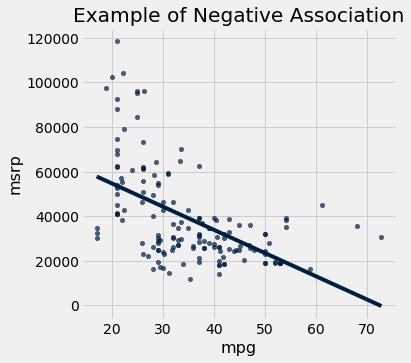

In [7]:
hybrid.scatter('mpg', 'msrp', fit_line=True)
plots.title("Example of Negative Association");

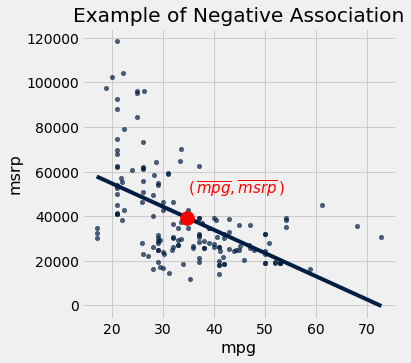

In [8]:
hybrid.scatter('mpg', 'msrp', fit_line=True)
plots.title("Example of Negative Association")
plots.scatter(np.mean(hybrid.column('mpg')), np.mean(hybrid.column('msrp')), color='r', s =200, zorder=4)
plots.text(35, 50000, "$(\,\overline{mpg}, \overline{msrp}\,)$", color = "red", size=15);

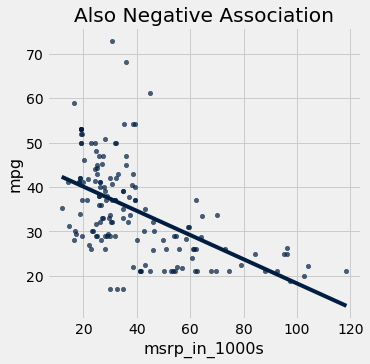

In [9]:
hybrid = hybrid.with_column('msrp_in_1000s', hybrid.column('msrp')/1000)
hybrid.scatter('msrp_in_1000s', 'mpg', fit_line=True)
plots.title("Also Negative Association");

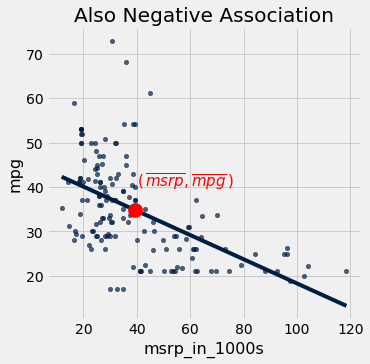

In [10]:
hybrid = hybrid.with_column('msrp_in_1000s', hybrid.column('msrp')/1000)

hybrid.scatter('msrp_in_1000s', 'mpg', fit_line=True)
plots.title("Also Negative Association")
plots.scatter(np.mean(hybrid.column('msrp_in_1000s')), np.mean(hybrid.column('mpg')), color='r', s =200, zorder=4)
plots.text(40, 40, "$(\,\overline{msrp}, \overline{mpg}\,)$", color = "red", size=15);

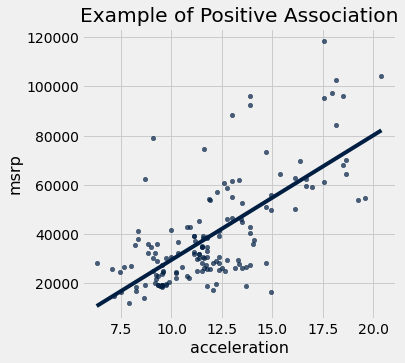

In [11]:
hybrid.scatter('acceleration', 'msrp', fit_line=True)
plots.title("Example of Positive Association");


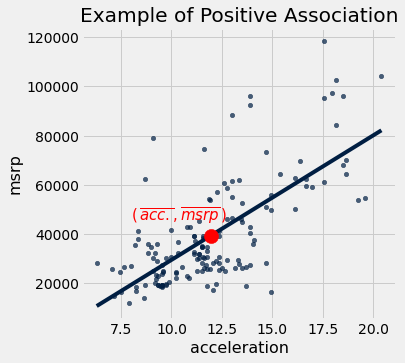

In [12]:
hybrid.scatter('acceleration', 'msrp', fit_line=True)
plots.scatter(np.mean(hybrid.column('acceleration')), np.mean(hybrid.column('msrp')), color='r', s =200, zorder=4)
plots.text(8, 45000, "$(\,\overline{acc.}, \overline{msrp}\, )$", color = "red", size=15)
plots.title("Example of Positive Association");

## Correlation ##

The correlation coefficient, denoted by either $r$ or $R$, depending upon where you look, is a statistic that measures both strength and direction of association.  

### Calculating $r$ ###


$$r = \frac{1}{n-1} \sum_{i=1}^n \left(\frac{x_i-\overline{x}}{S_x}\right)\left(\frac{y_i-\overline{y}}{S_y}\right)$$



In [13]:
from hidden_demos import r_scatter, r_table, correlation_demo

hide_code()

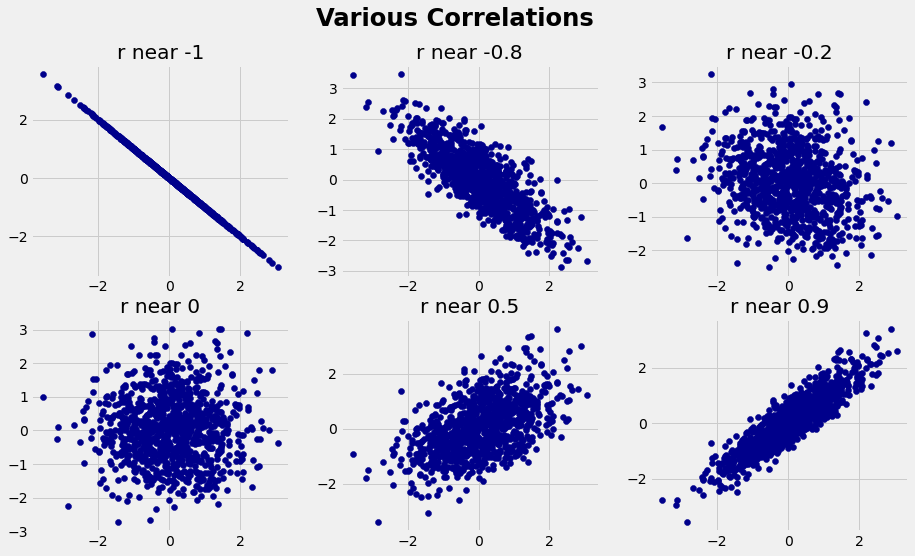

In [14]:
correlation_demo()

In [48]:
hybrid = Table.read_table('hybrid.csv')
suv = hybrid.where('class', 'SUV').drop('class', 'year')

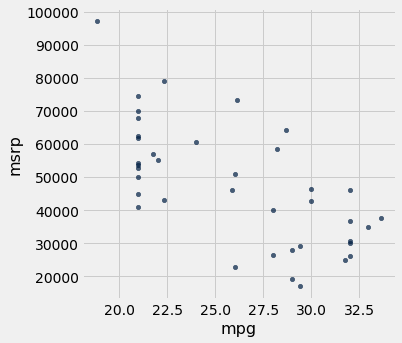

In [49]:
suv.scatter('mpg', 'msrp')

## Correlation command in scipy.stats ##

The correlation command in scipy.stats is actually called pearsonr, presumably after Karl Pearson, but as we import it, we can change its name to something that more memorable.  

In [50]:
from scipy.stats import pearsonr as cor


In [51]:
# Convert MPG and MSRP columns to standard units
# and put them back in the table.

mpg = suv.column('mpg')
msrp = suv.column('msrp')

cor(mpg, msrp)

(-0.6667143635709918, 3.585192058812033e-06)

The first number is the correlation coefficient.

The second number is actually the p-value for a hypothesis test which is testing to see if this correlation is significantly different from 0.  

$H_o: \rho = 0$
    
$H_a: \rho \not=0$

A large p-value supports the null hypothesis, and a small one supports the alternative.  As this p-value is small (less than 0.05), if we were interested in that part, we would conclude that this correlation is not 0.  



### Reporting Out ###

#### For vehicles considered SUV's, according to this data the correlation between MSRP and MPG is -0.67.  In other words, the higher the suggested price for the vehicle, the lower the fuel efficiency.  This correlation was significantly different from 0 with p < 0.001.  ####

## Other situations that can lead to r near 0 ##



### Nonlinearity ###

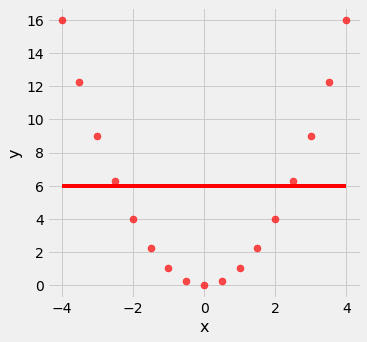

In [26]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=50, color='r', fit_line=True)

In [27]:
cor(nonlinear.column("x"), nonlinear.column("y"))

(0.0, 1.0)

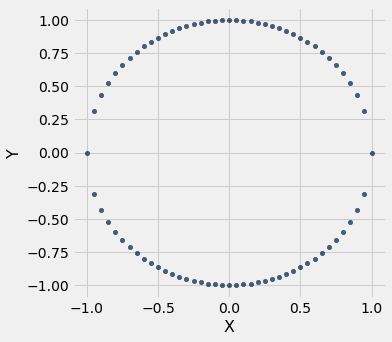

In [31]:
x1 = np.arange(-1,1,0.05)
x2 = np.arange(1,-1,-0.05)

x = np.append(x1, x2)

y1 = (1-x1**2)**0.5
y2 = -(1-x2**2)**0.5

y = np.append(y1, y2)

Table().with_columns("X",x, "Y",y).scatter("X")

In [32]:
cor(x, y)

(4.179067048723572e-16, 1.0)

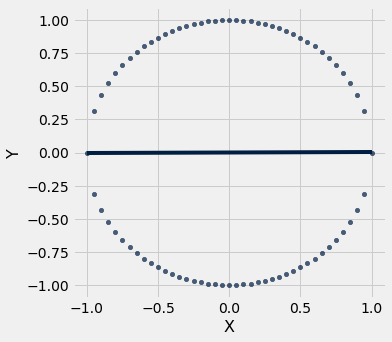

In [33]:
Table().with_columns("X",x, "Y",y).scatter("X", fit_line=True)

(0.0, 0.9999999999999999)

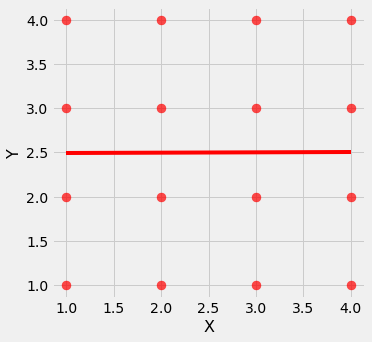

In [100]:
x = make_array(1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4)
y = make_array(1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4)

Table().with_columns("X",x, "Y",y).scatter("X", s=80, color="red", fit_line=True)

cor(x,y)

### Outliers and Influential Points ###

We'll discuss the outliers and influential points again after we have studied regression lines in more detail, but for now we can see that there are examples of influential points that can ruin an otherwise strong correlation.  On the other hand, they can also create a correlation where one does not really exist.  

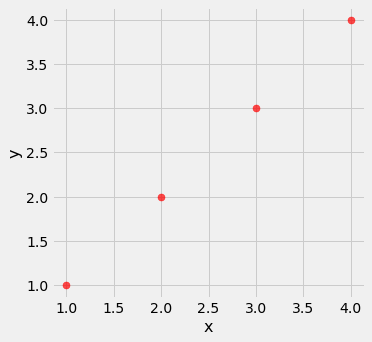

In [63]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=50, color='r')

In [64]:
cor(line.column("x"), line.column("y"))

(1.0, 0.0)

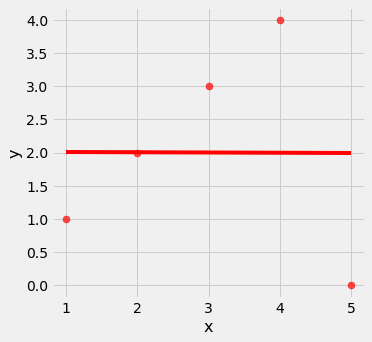

In [65]:
influential = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
influential.scatter('x', 'y', s=50, color='r',  fit_line=True)

In [66]:
cor(influential.column('x'), influential.column('y'))

(0.0, 1.0)

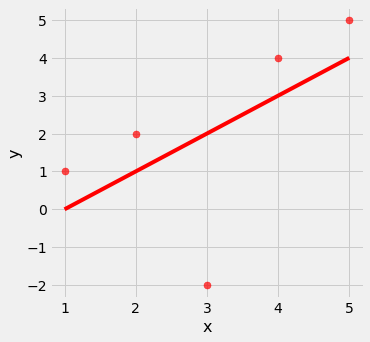

In [67]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, -2, 4, 5)
    )
outlier.scatter('x', 'y', s=50, color='r', fit_line=True)

In [68]:
cor(outlier.column('x'), outlier.column('y'))

(0.5773502691896257, 0.30806800925035743)

(0.8210981230398559, 0.02355299979172652)

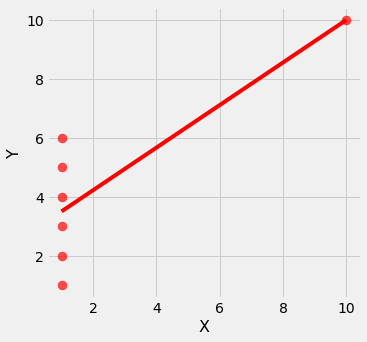

In [71]:
x=make_array(1,1,1,1,1,1,10)
y=make_array(1,2,3,4,5,6,10)

Table().with_columns("X",x,"Y",y).scatter("X", fit_line=True, s=80, color="red")

cor(x, y)

This example begs the following question:

### What if the data forms a horizontal or vertical line?  ###

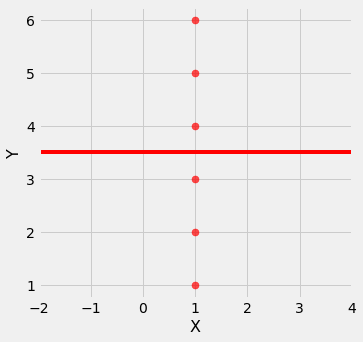

In [69]:
x = make_array(1,1,1,1,1,1)
y = make_array(1,2,3,4,5,6)

Table().with_columns("X",x, "Y",y).scatter("X", s=50, color="red")
plots.xlim(make_array(-2,4))
draw_line(slope=0, intercept = 3.5);



In [73]:
cor(x,y)

C:\Users\bbailey\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


(nan, 1.0)

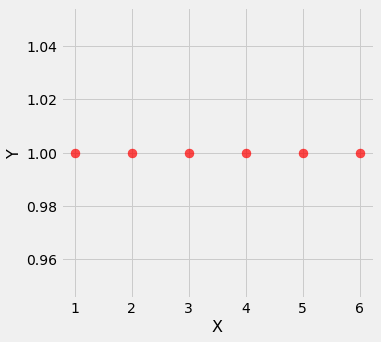

In [74]:
x = make_array(1,2,3,4,5,6)
y = make_array(1,1,1,1,1,1)

Table().with_columns("X",x, "Y",y).scatter("X", s=50, color="red")


In [75]:
cor(x,y)

C:\Users\bbailey\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


(nan, 1.0)

### Facts about Correlation ###

- Unitless
- Switching axes does not matter
- Unit conversions do not matter
- Correlation does not imply causation!

<figure>
    <img src= "https://imgs.xkcd.com/comics/correlation.png">
    <center> <figcaption> Source: https://xkcd.com/552/ </figcaption> </center>
</figure>

### More Real World Correlations ###

In [102]:
election16 = Table.read_table('election2016_state.csv')
election16

State,Median Income,Percent voting for Clinton
Alabama,47221,0.343579
Alaska,75723,0.365509
Arizona,57100,0.45126
Arkansas,45907,0.336519
California,66637,0.617264
Colorado,70566,0.481565
Connecticut,75923,0.545663
Delaware,58046,0.53086
Florida,51176,0.478233
Georgia,53527,0.4564


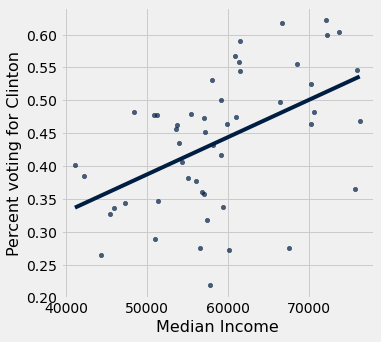

In [103]:
election16.scatter('Median Income', 'Percent voting for Clinton', fit_line=True)

In [144]:
cor(election16.column("Median Income"), election16.column("Percent voting for Clinton"))

(0.4934072687973065, 0.00027172542272414736)

### Reporting Out ###

With $r \approx 0.49$ there is a moderate correlation between median income and the percent of the voting population that voted for Clinton.


In [145]:
0.4934072687973065**2

0.24345073290201746

In [73]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014.show(4)

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698


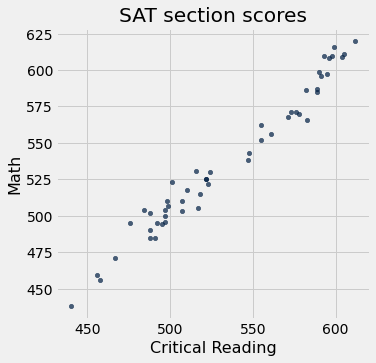

In [90]:
sat2014.scatter('Critical Reading', 'Math')
plots.title("SAT section scores");

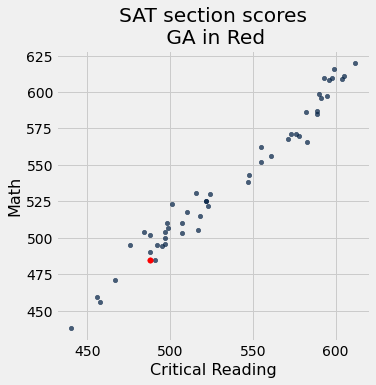

In [92]:
sat2014.scatter('Critical Reading', 'Math')
plots.scatter([488],[485], s=30, color = 'red')
plots.title("SAT section scores\n GA in Red");

In [75]:
cor(sat2014.column('Critical Reading'), sat2014.column('Math'))

(0.9847558411067432, 6.932520070002405e-39)

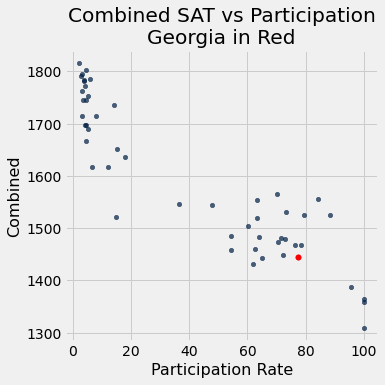

In [107]:
sat2014.scatter('Participation Rate', 'Combined')
plots.title("Combined SAT vs Participation\nGeorgia in Red")
plots.scatter([77.2], [1445], color='red', s = 30, zorder=4);

In [79]:
cor(sat2014.column('Participation Rate'), sat2014.column('Combined'))

(-0.9111376507316864, 1.6926058642816872e-20)

In [93]:
-0.9111376507316864**2

-0.8301718185808565

In [80]:
sat2014.sort('Participation Rate', descending=True)

State,Participation Rate,Critical Reading,Math,Writing,Combined
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Idaho,100,458,456,450,1364
Maine,95.6,467,471,449,1387
Connecticut,88.4,507,510,508,1525
Massachusetts,84.1,516,531,509,1556
New Jersey,79.3,501,523,502,1526
Maryland,78.5,492,495,481,1468
Georgia,77.2,488,485,472,1445
New York,76.3,488,502,478,1468


## $R^2$, the Coefficient of Determination ##

$R^2$ (or $r^2$) is literally what you get if you square the correlation.  It is called the coefficient of determination and what it tells us is what percent of the variation in the y variable is explained by a linear model using only the x variable as the predictor.  

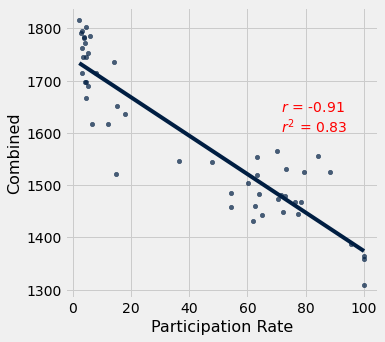

In [101]:
sat2014.scatter('Participation Rate', 'Combined', fit_line=True)
plots.title("Combined SAT vs Participation")
plots.text(70, 1600, " $r$ = -0.91\n $r^2$ = 0.83", color='red');

By itself, the states participation rates explain about 83% of the variability we see in the combined SAT scores.  

In [108]:
cor(election16.column("Median Income"), election16.column("Percent voting for Clinton"))

(0.4934072687973066, 0.00027172542272414714)

In [109]:
0.4934072687973065**2

0.24345073290201746

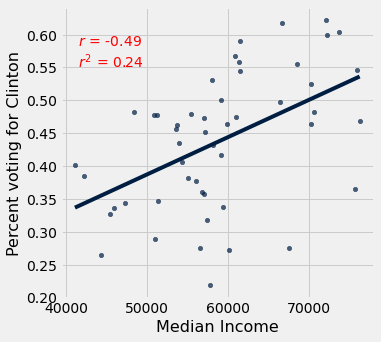

In [106]:
election16.scatter("Median Income", "Percent voting for Clinton", fit_line=True)
plots.text(41000, .55, " $r$ = -0.49\n $r^2$ = 0.24", color='red');

Median income only explains about 24% of the variability we see in the percent for Clinton.
